# Data Visualisation Overview
In this notebook, we will practice data visualisation in Python using Kaggle survey data, asking people about their use of various machine learning tools in the workplace [here](https://www.kaggle.com/kaggle/kaggle-survey-2018). A great resource for general tips about making visualisations, [Google](https://material.io/design/communication/data-visualization.html) has their own in-house resource with lots of useful information. 

This notebook will be focusing on the following two packages: 


1. [**Seaborn**](https://seaborn.pydata.org/index.html) for making easy, visually appealing graphics 
    * Better default graphics, and a larger variety of graphs to enhance data communication 
    * More customiseable and visually appealing (e.g., [colour palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) & [figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html))



2. [**Plotly Express**](https://plot.ly/python/plotly-express/) for making interactive, publication-quality graphics 
    * Can make your visuals [interactive and animated](https://plot.ly/python/animations/)
    * *Optional*: Plotly Dash to make dashboards for your plotly graphics



*Optional:* These other packages that could be additional, beneficial tools. Take a look at them or use in on the online practice!
3. [**Bokeh**](https://bokeh.pydata.org/en/latest/index.html), another package for making interactive plots
4. [**ggplot**](https://github.com/hadley/ggplot) (a graphics package from R, made useable in Python)


Throughout this practice, keep in mind which graphs work best with certain types of data (see the below list). 
A good visualisation resource is [data-to-viz](http://data-to-viz.com), a website that helps you choose the appropriate graphs based on the data you have.

# Load the libraries
Start by loading the libraries that are needed for all the visualisation tools we will be using.

In [1]:
import pandas as pd                        # basic data manipulation
import numpy as  np                        # basic data manipulation

import matplotlib.pyplot as plt            # for basic graphical settings
import seaborn as sns                      # for seaborn visualisations
%matplotlib inline 
      # this renders any figures inside your notebook (sometimes needed in some versions of jupyter notebook)

import plotly as py                        # for exporting animations as html, and using other plotly-based tools
import plotly.express as px                # for plotly express visualisations


# if any of these libraries are not already installed on your computer, type the following in the command line: 
    #(for seaborn):           pip install seaborn 
    #(for plotly):            pip install plotly
    #(for plotly express):    pip install plotly_express      

# Import & Clean the Data
A smaller, cleaner version of the data has already been made available on [Google Sheets](https://decd.co/vis_data). Make sure to save it to the same folder as this notebook. Once loaded, take a look at the data. 

In [3]:
# Import the data
df = pd.read_csv("kaggle_survey_data.csv") 

In [4]:
# Check your data
df.sample(15)

# drop all missing row values for the entire dataframes (majority of data is dropped but that's alright)
df.dropna(inplace=True)

# get info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5304 entries, 1 to 21768
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gender                              5304 non-null   object 
 1   age_range                           5304 non-null   object 
 2   country                             5304 non-null   object 
 3   continent                           5304 non-null   object 
 4   highest_edu                         5304 non-null   object 
 5   undergrad_major                     5304 non-null   object 
 6   job_title                           5304 non-null   object 
 7   industry                            5304 non-null   object 
 8   annual_salary                       5304 non-null   object 
 9   most_used_language                  5304 non-null   object 
 10  language_recommend                  5304 non-null   object 
 11  most_used_viz_tool                  5304 n

# Seaborn
Seaborn is a powerful and easy-to-use graphing package to make some great visuals for data exploration, analysis, and communication. Take a look at the following websites for inspiration, codes, and tips & tricks: 
* [Seaborn Website](https://seaborn.pydata.org/examples/index.html)
* [Python Graph Gallery: Seaborn](https://python-graph-gallery.com/seaborn)

## 1. Colour 
In this section, we are going to use different graphs to practice various ways you can use colour. For instance, how to use built-in colour palettes, how make your own palettes & emphasise one part to highlight importance, and appropriate colour combinations for your audience.

### Colour Palettes & Themes**
Python has several themes, color palettes and colour customisation. Themes are the overall look to the graphs - think backgrounds, tick marks, grid lines, and more. Colour palettes are the colours used for the data itself (the bars in bar plots, the bubbles in bubble charts, the lines in line graphs, etc.). 

**Default Themes:** 
There are [5 default themes](https://seaborn.pydata.org/tutorial/aesthetics.html) in Seaborn, which are changed by using `sns.set_style(" ")` before your write the code for your graph. The 5 themes you choose from are `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. Simply pick the one you want and place them inside the quotation marks. This will apply to all subsequent graphs you make. 

**Default & Custom Colours:**
You can use built-in single colours using `color=" "`. For colour palettes use the parameter `palette=" "`. One tip to see the whole list of palette name options is to leave the quotations blank - you will get an error in the output listing all the palette names! Below are some additionall resources:
* [Python Graph Gallery](https://python-graph-gallery.com/33-control-colors-of-boxplot-seaborn/)
* [Making Seaborn colour palettes](https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn/)

<AxesSubplot:xlabel='continent', ylabel='count'>

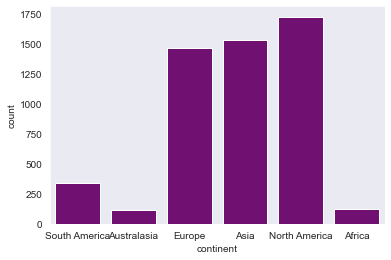

In [5]:
# setting the graph themes (once you do this, it will set ALL graphs)
sns.set_style("dark") 

# use "color=" for a single colour or "palette=" for a colour palette
sns.countplot(data=df, 
              x="continent", 
              # palette="inferno",    # use palette= to set a palette choice 
              color="purple")           # OR use color= to define a single colour 

<AxesSubplot:xlabel='continent', ylabel='count'>

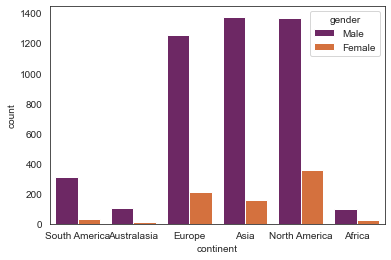

In [6]:
# grouped or stacked countplots (note how the palette use changes)
sns.set_style("white")

sns.countplot(data=df, x="continent", 
              palette="inferno",
              # dodge=False,       # using this parameter makes the bars stacked instead of grouped
              hue="gender")       # Hue is used to define your grouping variable

<br>***Making custom palettes (general)*** <br>
Create a list of colours, and make sure the number of colours you select match the number of feature levels (e.g., if a feature has 5 groups, select 5 colours), and the colours will be used in the order you type them. Then use the name of the list above as the palette name. When you use this method, do not add `""` around the palette name.

A list of all the default colour names can be found [here](https://matplotlib.org/3.1.0/gallery/color/named_colors.html). You can also use hex colour codes, just rememeber to include the `#` before the 6-character code. [Here](https://htmlcolorcodes.com/) is a good website to generate hex codes. 

<AxesSubplot:xlabel='continent', ylabel='count'>

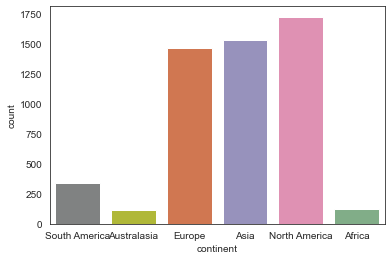

In [7]:
# option 1 - using default colour names:
my_pal1 = ["maroon", "darkorange", "gold", "darkblue", "grey", "green"]

# option 2 - using hex colour codes:
my_pal2=["#808282", "#C2CD23", "#E56F3C", "#918BC3", "#EC84B2", "#7AB483"]

sns.countplot(data=df, 
              x="continent", 
              palette=my_pal2)

<br>***Assigning a custom colour for emphasis*** <br>
It's fairly simple to highlight one particular category or level of data in your graphs, particularly bar charts. Then use the colour palette you named above in the function, using `palette=___`. You need to create a dictionary for which colour you want for each value of your categorical variable.

<AxesSubplot:xlabel='highest_edu', ylabel='count'>

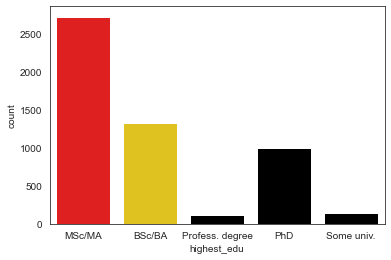

In [9]:
# option 1 - single value as one colour, all over values are a different colour
my_pal1={highest_edu: "red" if highest_edu == "MSc/MA" else "black" for highest_edu in df.highest_edu.unique()}

# option 2 - defining different values as different colours
my_pal2={"MSc/MA":"red", "BSc/BA":"gold", "PhD":"black", "Some univ.":"black", "Profess. degree":"black"}

sns.countplot(data=df, 
              x="highest_edu", 
              palette=my_pal2)

## 2. Shapes
Aside from colour, we need to make sure we choose the right kind of graph for our data. In a way, it is like choosing the right "shape" - do you use a bar chart or a pie chart? A scatterplot versus a line graph? Below, we will practice making a couple of graphs to determine which shape(s) of graphs are best for certain types of data. 

One key is to remember that graphs that work best for categorical data does not usually work for continuous data - and the reverse is also true. Also keep in mind that simpler graphs tend to work better for more generic presentations; save the detailed graphs for more technical audiences. 


### lineplot( ) vs. scatterplot( )
Here we are going to see how line plots and scatter plots differ, and see if/when they are useful. For both `lineplot()` and `scatterplot()`, the x-axis does not technically need to be numeric. However, using variables that are either numeric, or categorical with many categories, are optimal. 

<AxesSubplot:xlabel='percent_time_cleaning', ylabel='percent_time_model_build'>

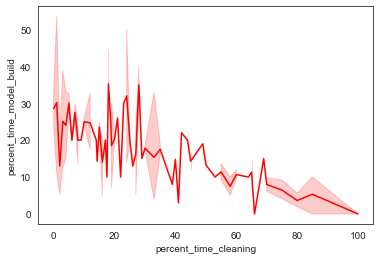

In [10]:
# Basic lineplot
sns.lineplot(data=df, 
             x="percent_time_cleaning", 
             y="percent_time_model_build", 
             color="red")

# What happens when you define a grouping variable using "hue"? 

# What happens if different numeric or categorical variables are used? Is the graph still useful?

Compare the lineplot example above to the scatterplot below. Consider how the data types affect how the graphs look, and whether they make sense. Which ones work better as scatterplots? Which work better as lineplots? 


<AxesSubplot:xlabel='percent_time_cleaning', ylabel='percent_time_model_build'>

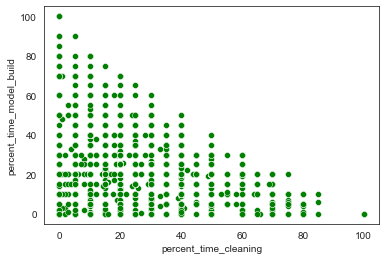

In [11]:
# Basic scatterplot
sns.scatterplot(data=df, 
                x="percent_time_cleaning", 
                y="percent_time_model_build", 
                color="green")

# What happens when you define a grouping variable using "hue"? 

# What happens if different numeric or categorical variables are used? How does it compare to the lineplots?

### Options with catplot( )
Other plots, like bar plots, are best for looking a particular continuous output for the different values in a categorical variable (e.g., height of men vs. women). Using `catplot()` allows you the freedom to choose different "shapes" for your graph. This is done by adding the parameter `kind=" "` to one of these values: `point`, `bar`, `strip`, `swarm`, `box`, `violin`, or `boxen`.

Bar plots are great for data exploration, analysis, and general communmication, while box plots are generally best for data exploration and analysis only. While other plots like violin and boxen might appear nice, they are generally not appropriate for most audiences, or for analysis - err on the side of caution with these types of plots.

Practice making different catplots by changing the `kind=` parameter. Which do you think are more technical? Which are more generic/user-friendly?

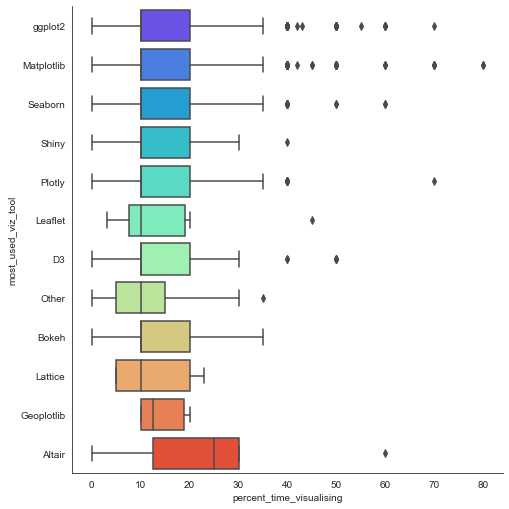

In [12]:
# change the x-axis and y-axis to orient the graph to be horizontal or vertical for kind=box
sns.catplot(data=df, y="most_used_viz_tool", x="percent_time_visualising", 
            palette="rainbow",
            height=7,      # to make the chart bigger 
            kind="box")     

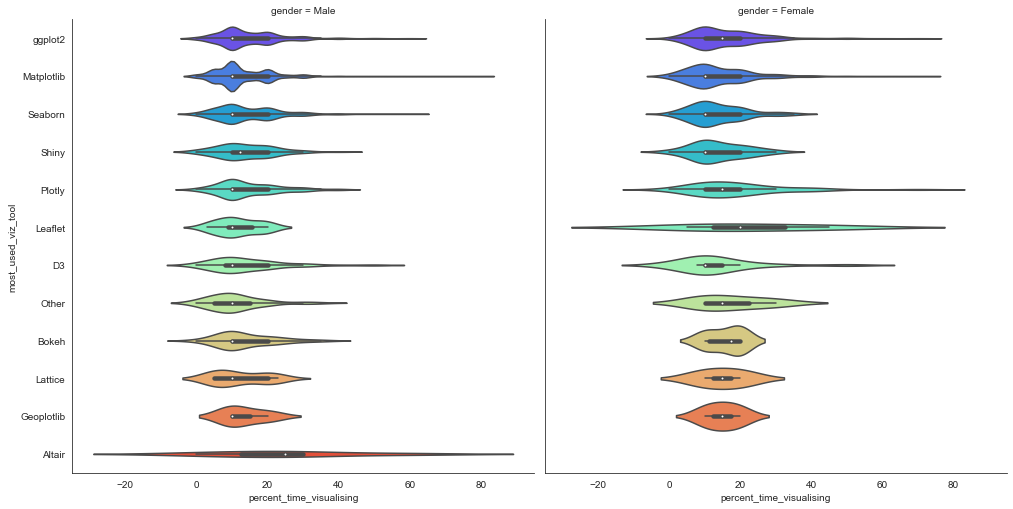

In [21]:
# use "col=" to make separate plots for each value of a categorical variable assigned to col=" "
sns.catplot(data=df, y="most_used_viz_tool", x="percent_time_visualising", 
            palette="rainbow",
            kind="violin", 
            height=7,
            col="gender")

In [ ]:
# Try using different settings for "kind=" in catplot(), and see how they all differ. 

## 3. Relation

Sometimes it can be hard to see how different types of data relate to each other. This is where the use of shape and colour can help. Moreover, organising data in an order that makes sense can also enhance our understanding of the story trying to be told.

### Reordering values in categorical variables
The below examples demonstrate how to re-order the values in categorical variables on the x or y axis, and your grouping variable

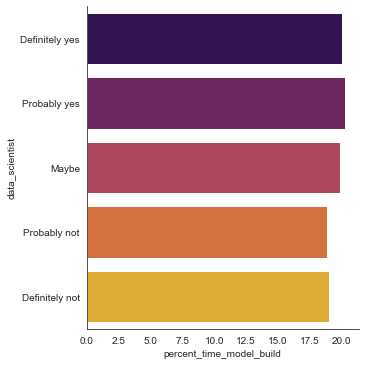

In [22]:
# reordering values of your categorical variable using "order=[]" 
sns.catplot(data=df, ci=0,                
            x="percent_time_model_build",
            y="data_scientist",  
            kind="bar", 
            order=["Definitely yes","Probably yes", "Maybe", "Probably not", "Definitely not"],
            palette="inferno")

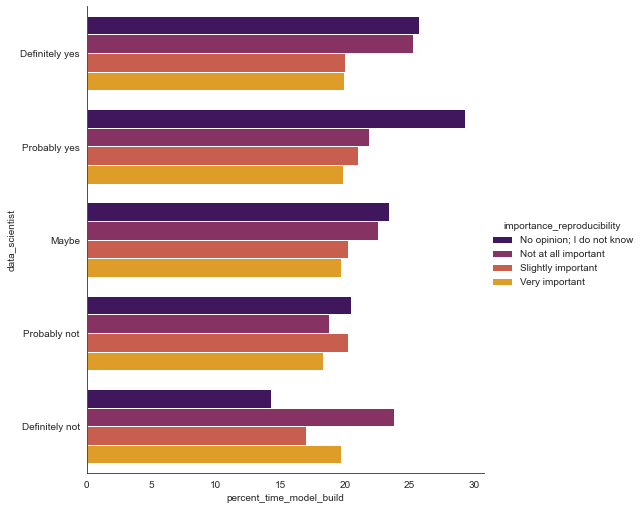

In [23]:
# Reorder values for grouping variable hue="__" by using hue_order=[] 
sns.catplot(data=df, ci=0,
            x="percent_time_model_build", 
            y="data_scientist", 
            kind="bar", 
            palette="inferno", 
            height=7,
            hue="importance_reproducibility",
            hue_order=['No opinion; I do not know', 'Not at all important', 'Slightly important', 'Very important'],
            order=["Definitely yes", "Probably yes", "Maybe", "Probably not", "Definitely not"])

### Bubble charts using scatterplot( )
Using bubble charts to show relationships between many values in a simplified way. This is essentially a scatterplot, but with an added parameter `size`, which scales the dots (or bubbles) based on a number range that you define, or another continuous (or even categorical) variable. 

<AxesSubplot:xlabel='percent_time_model_build', ylabel='percent_time_communicating'>

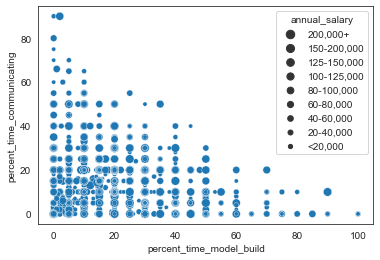

In [24]:
# Basic scatter plot using the "size=" parameter to scale the size of data points based on a third variable
sns.scatterplot(data=df, 
                x="percent_time_model_build", 
                y="percent_time_communicating", 
                size="annual_salary", 
                size_order=['200,000+', '150-200,000', '125-150,000', '100-125,000', 
                            '80-100,000', '60-80,000', '40-60,000', '20-40,000', '<20,000'])


## 4. Simplicity
Simple and clean graphs are better than graphs that have lots of visual distractions, or clutter. Things like grid lines, labels or titles that are too big or wordy, or even the location of a legend can make it harder to interpet graphs. Below are different ways to make your graphs look more steamlined and finished. 

Because seaborn is built on top of matplotlib, both seaborn and matplotlib codes will work to make small fixes to your visualisations. This ranges from changing the size of your graph to be bigger to make it easier to read, to changing the look and position of labels, legends, and tick marks. 

### Resizing Figures and Removing Figure Frames
To resize a figure, type `plt.figure(figsize=(x,y))` at the begging of your cell block. It will automatically resize any graph within the same code block to your specifications. The values `x` and `y` are floats, which represent the width (x) and height (y) of the figure in inches. 

*Note:* In some graphs like `catplot()`, you specify the `height` and `aspect` ratio within catplot() rather than using `figsize=` .

To remove the frame around a figure, type `plt.box(on=None)`. 

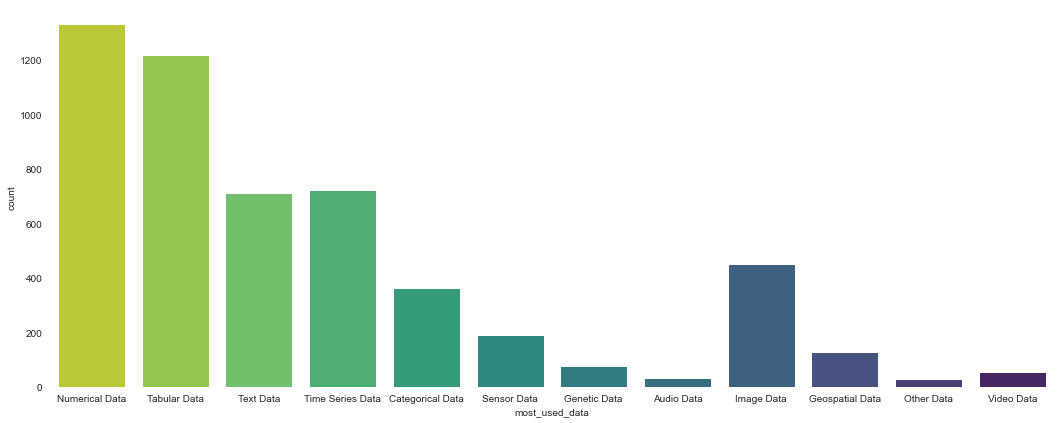

In [25]:
# Using figsize=() to change the size of the figure
plt.figure(figsize=(18,7)) 

sns.countplot(data=df, palette="viridis_r",
              x="most_used_data")

# Use this to remove the box around the graph
plt.box(on=None)

### Titles, Axis Labels, and Tick Marks
These are useful parameters for changing the titles and axis labels, as seaborn uses the feature name as the default label. However, not all graphs might need labels or titles, therefore sometimes it is best to remove them. 

Remember the ***data-ink ratio***: you want to convey the most amount of information possible, using the least amount of "ink" (or text / unnecessary items). Your graph should be able to speak for itself without needing much effort.

Text(0.5, 0, 'Do You Consider Yourself a Data Scientist?')

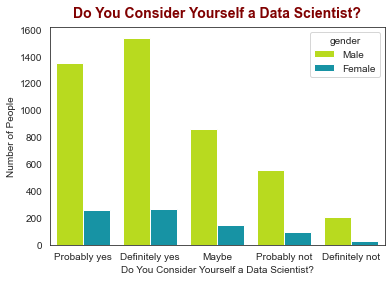

In [28]:
# basic plot
graph = sns.countplot(data=df, hue="gender", x="data_scientist", palette="nipy_spectral_r")

# change the title and axis names and settings: these can all be applied to set_title, set_ylabel, and set_xlabel
graph.set_title("Do You Consider Yourself a Data Scientist?", 
                pad=10,
                fontsize=14, 
                fontdict={"weight": "bold", "color": "maroon", "family": "sans-serif"})
graph.set_ylabel("Number of People")
graph.set_xlabel("Do You Consider Yourself a Data Scientist?")

# if you want to remove the y-axis and x-axis labels, do this instead
# graph.set_ylabel('')    
# graph.set_xlabel('')

[Text(0, 0, 'Definitely yes'),
 Text(1, 0, 'Probably yes'),
 Text(2, 0, 'Maybe'),
 Text(3, 0, 'Probably not'),
 Text(4, 0, 'Definitely not')]

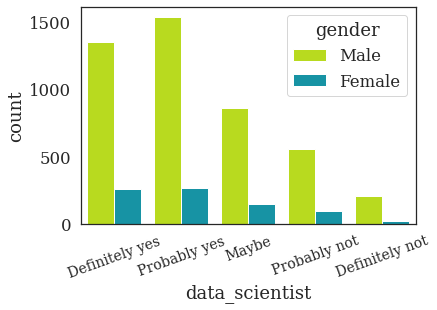

In [29]:
# setting font size and type, and other graphical characteristics, for all graphs in the cell
sns.set(font_scale = 1.5, font="serif", style="white")

# basic plot
graph = sns.countplot(data=df, hue="gender", x="data_scientist", palette="nipy_spectral_r")

# set font aesthetics for x-axis tick labels (STRINGS only); can use with y-axis with "set_yticklabels"
graph.set_xticklabels(labels=["Definitely yes","Probably yes", "Maybe", "Probably not", "Definitely not"], 
                      size=14, # font size 
                      rotation=20)

### Legend Positions

Seaborn defaults to placing legends into what it deems the "best" location. However, as a person, it might not be the best for us (it covers up data points), or should be placed outside the graph completely. These are some useful tips on how to move the legend to your desired location.

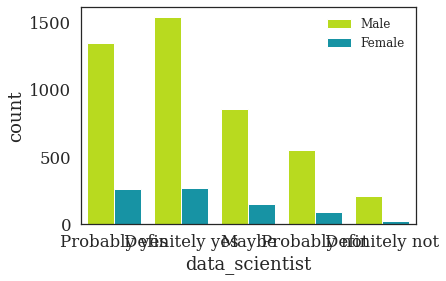

In [43]:
# Change the legend location inside the graph using .legend(loc=__), value can range from 0-10
graph = sns.countplot(data=df, hue="gender", x="data_scientist", palette="nipy_spectral_r")

graph.legend(loc=1, 
            frameon=False,  # this removes the box around the legend
            fontsize=12)    # this changes the font size of the legend   


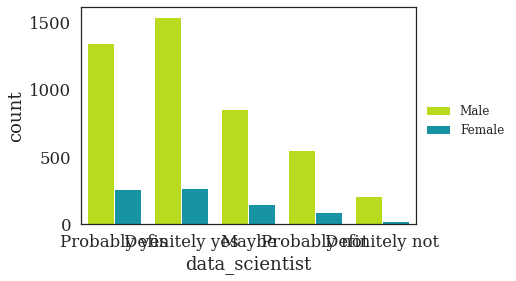

In [44]:
# use .legend(bbox_to_anchor=(x,y)) parameter to place the legend outside of the graph
# bbox_to_anchor=(x,y) is used together with loc=__, the x and y coordinates can be positive or negative values
graph = sns.countplot(data=df, hue="gender", x="data_scientist", palette="nipy_spectral_r")

graph.legend(bbox_to_anchor=(1, 0.6), 
            loc=2, 
            frameon=False,  
            fontsize=12)    

# Plotly Express
[Plotly express](https://plot.ly/python/plotly-express/) is another package that can take your visualisations to a whole other level. Aside from the same functionalities as seaborn, it has additional graphs, and the ability to make your graphs [animated](https://plot.ly/python/animations/) that you can save offline as html files. 

### Graphs in Plotly Express

Most of these graphs work in a similar way to seaborn (more information [here](https://plot.ly/python-api-reference/plotly.express.html)). As a side note, to use a categorical variable as a "grouping" variable, you use `color=` (instead of `hue=` like in seaborn).

#### Making graphs interactive and animated
You can show more information when hovering over a data point by using the `hover_name="__"` parameter. Simply type a categorical variable in the `""`, and the information will appear when you hover over a specific data point.

Two main animation parameters you can add to your graphs:
* Use `animation_frame="__"` to move between "frames" (e.g., each frame might be a different year to show how the graph changes over time)
* Use `animation_group="__"` to group the data points by that change in each frame

Animations can be very powerful, but only in the right circumstances. This usually means it is only helpful (and should be used) when you are dealing with data that has some aspect of time to it.

In [45]:
# making a scatter plot and adding animations. Is it helpful or no?
px.scatter(df, x="percent_time_communicating", y="percent_time_visualising",  
           color="gender",          
           hover_name="industry",
           animation_frame="age_range",
           category_orders={"age_range":["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55+"]}) 

In [46]:
# making a bar chart and adding animations. Is it helpful or no?
px.bar(df, x="data_scientist", y="percent_time_visualising",  
           color="gender",         
           hover_name="industry",
           animation_frame="age_range",
           category_orders={"age_range":["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55+"]}) 

#### Making 3-D graphs
Another powerful tool in plotly express is the ability to make 3-D graphs. Like animations, they are something that should only be used in very specific situations. Under normal circumstances, these can be very confusing to understand, and ***should be used with caution***.

In [47]:
# making a 3D scatter plot
graph = px.scatter_3d(df,
              x="percent_time_visualising", 
              y="percent_time_communicating", 
              z="percent_time_model_build",
              color="gender", 
              symbol="gender", 
              size="percent_time_cleaning")

In [48]:
# making a 3D line chart
px.line_3d(df, x="percent_time_visualising", 
           y="percent_time_communicating", 
           z="percent_time_model_build",
           color="gender")

#### Saving your graphs 
**seaborn graphs as .png files**
<br> To save your seaborn graph, use the following code, typing the name of your graph in place of `___` :

`___.get_figure().savefig("desired_filename_here.png")` 




<br>**plotly express graphs as .html files**
<br>
To save your interactive and animated graphs offline as html files, use the following code, typing the name of your graph in place of `___` :

`py.offline.plot(____, filename="desired_filename_here.html")`  

# Tell A Story: Make Your Own Graph

With the different seaborn and plotly express tools, try making a graph that tells a visual story with the data.

In [49]:
# Write the code for your graph below: